In [89]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


Q2

In [116]:

# (a) & (b): Preprocessing

def preprocess_data(train_df, val_df, test_df, target_col='Appliances'):
    """
    Preprocess the input DataFrames by performing the following steps:
      1. Drop non-numeric or irrelevant columns (e.g., columns with 'date' or 'time' in their names).
      2. Drop rows with missing values.
      3. Separate features from the target.
      4. Scale the features using StandardScaler (zero mean, unit variance) fitted on the training data.
    
    Parameters:
      - train_df, val_df, test_df: pandas DataFrames containing the data (each should include the target).
      - target_col: the name of the target column (default 'Appliances').
    
    Returns:
      - train_features_scaled, train_target: Scaled training features and the target.
      - val_features_scaled, val_target: Scaled validation features and the target.
      - test_features_scaled, test_target: Scaled test features and the target.
    """
    
    # 1. Drop irrelevant columns (e.g., those containing 'date' or 'time')
    def drop_irrelevant(df):
        cols_to_drop = [col for col in df.columns if 'date' in col.lower() or 'time' in col.lower()]
        return df.drop(columns=cols_to_drop)
    
    train_df = drop_irrelevant(train_df)
    val_df   = drop_irrelevant(val_df)
    test_df  = drop_irrelevant(test_df)
    
    # 2. Drop rows with missing values
    train_df = train_df.dropna()
    val_df   = val_df.dropna()
    test_df  = test_df.dropna()
    
    # 3. Separate features and target
    train_features = train_df.drop(columns=[target_col])
    train_target   = train_df[target_col]
    
    val_features   = val_df.drop(columns=[target_col])
    val_target     = val_df[target_col]
    
    test_features  = test_df.drop(columns=[target_col])
    test_target    = test_df[target_col]
    
    # 4. Scale the features using StandardScaler (fit on training data)
    scaler = StandardScaler()
    train_features_scaled = pd.DataFrame(
        scaler.fit_transform(train_features),
        columns=train_features.columns,
        index=train_features.index
    )
    val_features_scaled = pd.DataFrame(
        scaler.transform(val_features),
        columns=val_features.columns,
        index=val_features.index
    )
    test_features_scaled = pd.DataFrame(
        scaler.transform(test_features),
        columns=test_features.columns,
        index=test_features.index
    )
    
    return train_features_scaled, train_target, val_features_scaled, val_target, test_features_scaled, test_target


# (c) Standard Linear Regression Model

def eval_linear1(trainx, trainy, valx, valy, testx, testy):
    """
    Trains a standard linear regression model on the training data and returns a dictionary
    containing RMSE and R² metrics for training, validation, and test sets.
    """
    model = LinearRegression()
    model.fit(trainx, trainy)
    
    # Predictions on each set
    preds_train = model.predict(trainx)
    preds_val   = model.predict(valx)
    preds_test  = model.predict(testx)
    
    # Compute metrics
    metrics = {
        'train-rmse': np.sqrt(mean_squared_error(trainy, preds_train)),
        'train-r2':   r2_score(trainy, preds_train),
        'val-rmse':   np.sqrt(mean_squared_error(valy, preds_val)),
        'val-r2':     r2_score(valy, preds_val),
        'test-rmse':  np.sqrt(mean_squared_error(testy, preds_test)),
        'test-r2':    r2_score(testy, preds_test)
    }
    return metrics


# (d) Ridge Regression Evaluation

def eval_ridge(trainx, trainy, valx, valy, testx, testy, alpha):
    """
    Trains a ridge regression model with the given alpha on the training data
    and returns a dictionary containing RMSE and R² metrics for train, val, and test.
    """
    model = Ridge(alpha=alpha)
    model.fit(trainx, trainy)
    
    # Predictions
    preds_train = model.predict(trainx)
    preds_val   = model.predict(valx)
    preds_test  = model.predict(testx)
    
    # Compute metrics
    metrics = {
        'train-rmse': np.sqrt(mean_squared_error(trainy, preds_train)),
        'train-r2':   r2_score(trainy, preds_train),
        'val-rmse':   np.sqrt(mean_squared_error(valy, preds_val)),
        'val-r2':     r2_score(valy, preds_val),
        'test-rmse':  np.sqrt(mean_squared_error(testy, preds_test)),
        'test-r2':    r2_score(testy, preds_test)
    }
    return metrics


# (e) Lasso Regression Evaluation

def eval_lasso(trainx, trainy, valx, valy, testx, testy, alpha):
    """
    Trains a lasso regression model with the given alpha on the training data
    and returns a dictionary containing RMSE and R² metrics for train, val, and test.
    """
    # Increase max_iter to ensure convergence
    model = Lasso(alpha=alpha, max_iter=10000)
    model.fit(trainx, trainy)
    
    # Predictions
    preds_train = model.predict(trainx)
    preds_val   = model.predict(valx)
    preds_test  = model.predict(testx)
    
    # Compute metrics
    metrics = {
        'train-rmse': np.sqrt(mean_squared_error(trainy, preds_train)),
        'train-r2':   r2_score(trainy, preds_train),
        'val-rmse':   np.sqrt(mean_squared_error(valy, preds_val)),
        'val-r2':     r2_score(valy, preds_val),
        'test-rmse':  np.sqrt(mean_squared_error(testy, preds_test)),
        'test-r2':    r2_score(testy, preds_test)
    }
    return metrics


# (g) Coefficient Path Plot for Ridge and Lasso

def plot_coefficient_paths(model_class, trainx, trainy, alphas, model_name=''):
    """
    Plots the coefficient paths for a given regression model (Ridge or Lasso) over a range of alpha values.
    
    Parameters:
      - model_class: the regression class (Ridge or Lasso)
      - trainx: training features (DataFrame or array)
      - trainy: training target
      - alphas: list or array of alpha values to try
      - model_name: string name for the model (for the plot title)
    """
    coefs = []
    for a in alphas:
        model = model_class(alpha=a, max_iter=10000)  # Lasso might need a higher max_iter
        model.fit(trainx, trainy)
        coefs.append(model.coef_)
    coefs = np.array(coefs)
    
    plt.figure(figsize=(10, 6))
    for i in range(coefs.shape[1]):
        # If trainx is a DataFrame, use the column names
        if hasattr(trainx, 'columns'):
            label = trainx.columns[i]
        else:
            label = f'Feature {i}'
        plt.plot(alphas, coefs[:, i], label=label)
    
    plt.xscale('log')
    plt.xlabel('Alpha')
    plt.ylabel('Coefficient Value')
    plt.title(f'{model_name} Coefficient Paths')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
    plt.tight_layout()
    plt.show()

IMPLEMENTING THE FUNCTIONS


Standard Linear Regression Metrics:
{'train-rmse': np.float64(98.23103848878637), 'train-r2': 0.18675401399493108, 'val-rmse': np.float64(97.53986578772172), 'val-r2': 0.0026790084850937257, 'test-rmse': np.float64(100.03023430387991), 'test-r2': -0.21168451232273933}

Ridge Regression Metrics:
Ridge - Alpha: 0.001 => {'train-rmse': np.float64(98.2310384892513), 'train-r2': 0.18675401398723268, 'val-rmse': np.float64(97.53993670205654), 'val-r2': 0.002677558321515061, 'test-rmse': np.float64(100.03039801358983), 'test-r2': -0.211688478417265}
Ridge - Alpha: 0.01 => {'train-rmse': np.float64(98.23103853520469), 'train-r2': 0.186754013226345, 'val-rmse': np.float64(97.54057486319942), 'val-r2': 0.002664508189789472, 'test-rmse': np.float64(100.03187131883303), 'test-r2': -0.21172417156995582}
Ridge - Alpha: 0.1 => {'train-rmse': np.float64(98.23104305576229), 'train-r2': 0.1867539383757587, 'val-rmse': np.float64(97.54694924126379), 'val-r2': 0.0025341501060512917, 'test-rmse': np.float6

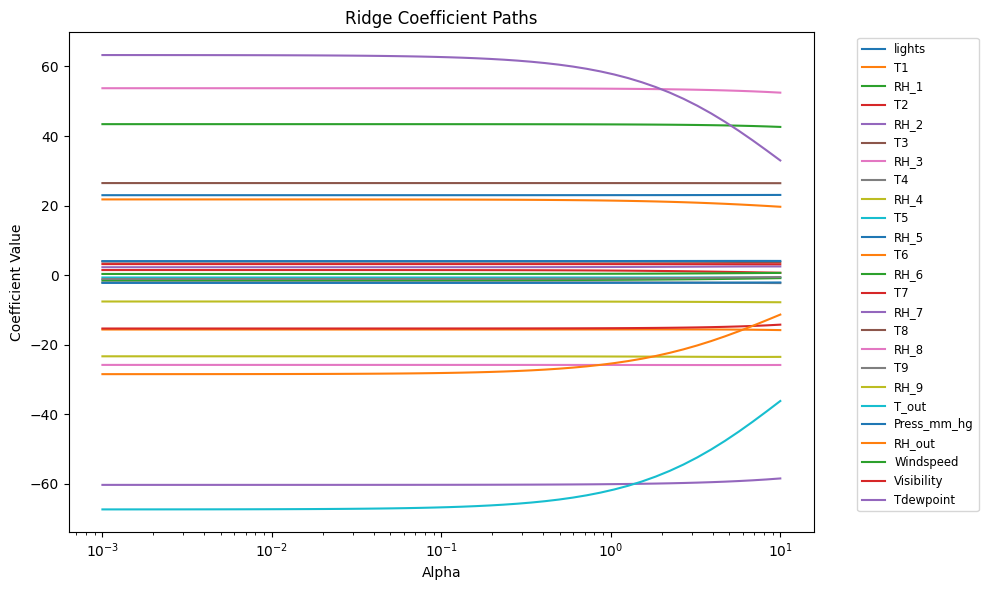


Plotting Lasso Coefficient Paths:


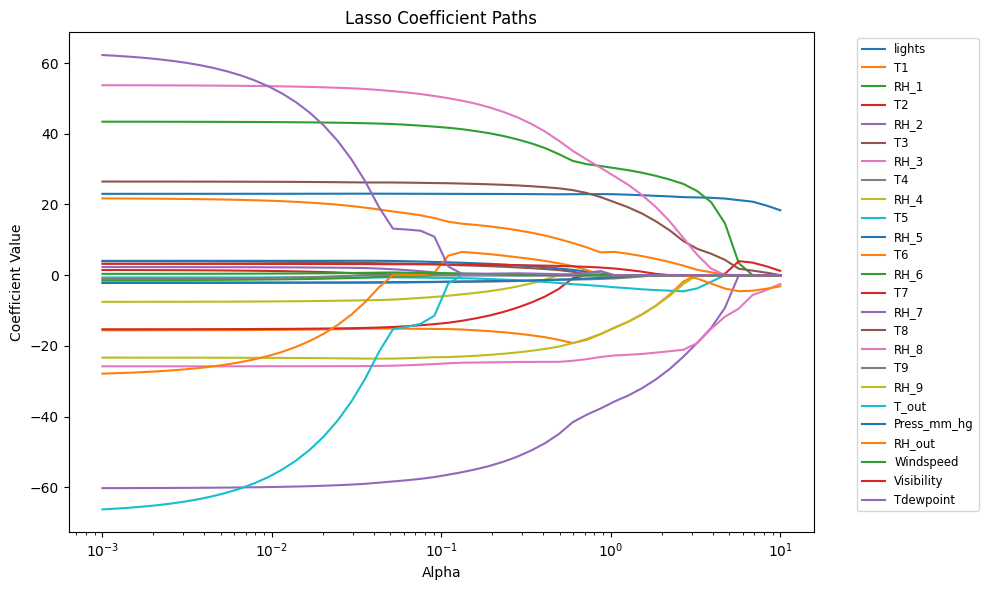


Observations:
1. For Ridge regression, coefficients shrink smoothly as alpha increases, but rarely become exactly zero.
2. For Lasso regression, many coefficients are driven exactly to zero for moderate to high alpha values, effectively performing feature selection.
3. The optimal regularization parameter (as judged by the validation RMSE) shows a balance between underfitting and overfitting. Here, we selected the alpha value with the lowest validation RMSE as optimal for each model.


In [93]:
def main():
    # ---------------
    # Data Loading
    # ---------------
    # paths to your CSV files.
    train_path = 'downloads/energydata/energy_train.csv'
    val_path   = 'downloads/energydata/energy_val.csv'
    test_path  = 'downloads/energydata/energy_test.csv'
    
    train_df = pd.read_csv(train_path)
    val_df   = pd.read_csv(val_path)
    test_df  = pd.read_csv(test_path)
    
    # ---------------
    # Preprocessing (with scaling)
    # ---------------
    # The function returns scaled features and targets separately.
    trainx, trainy, valx, valy, testx, testy = preprocess_data(train_df, val_df, test_df, target_col='Appliances')
    
    # ---------------------------
    # (c) Standard Linear Model
    # ---------------------------
    metrics_linear = eval_linear1(trainx, trainy, valx, valy, testx, testy)
    print("Standard Linear Regression Metrics:")
    print(metrics_linear)
    
    # ---------------------------
    # (d) Ridge Regression
    # ---------------------------
    ridge_alphas = [0.001, 0.01, 0.1, 1, 10]
    ridge_results = {}
    print("\nRidge Regression Metrics:")
    for alpha in ridge_alphas:
        metrics = eval_ridge(trainx, trainy, valx, valy, testx, testy, alpha)
        ridge_results[alpha] = metrics
        print(f"Ridge - Alpha: {alpha} => {metrics}")
    
    # ---------------------------
    # (e) Lasso Regression
    # ---------------------------
    lasso_alphas = [0.001, 0.01, 0.1, 1, 10]
    lasso_results = {}
    print("\nLasso Regression Metrics:")
    for alpha in lasso_alphas:
        metrics = eval_lasso(trainx, trainy, valx, valy, testx, testy, alpha)
        lasso_results[alpha] = metrics
        print(f"Lasso - Alpha: {alpha} => {metrics}")
    
    # ---------------------------
    # (f) Reporting Metrics in Tables & Selecting Optimal Parameter
    # ---------------------------
    # Create a DataFrame for Ridge results
    ridge_df = pd.DataFrame.from_dict(ridge_results, orient='index')
    ridge_df.index.name = 'alpha'
    print("\nRidge Regression Metrics Table:")
    print(ridge_df)
    
    # Determine the optimal Ridge alpha based on lowest validation RMSE
    optimal_ridge = ridge_df['val-rmse'].idxmin()
    print(f"\nOptimal Ridge alpha based on validation RMSE: {optimal_ridge}")
    
    # Create a DataFrame for Lasso results
    lasso_df = pd.DataFrame.from_dict(lasso_results, orient='index')
    lasso_df.index.name = 'alpha'
    print("\nLasso Regression Metrics Table:")
    print(lasso_df)
    
    # Determine the optimal Lasso alpha based on lowest validation RMSE
    optimal_lasso = lasso_df['val-rmse'].idxmin()
    print(f"\nOptimal Lasso alpha based on validation RMSE: {optimal_lasso}")
    
    # ---------------------------
    # (g) Coefficient Path Plots
    # ---------------------------
    alphas_range = np.logspace(-3, 1, 50)
    
    print("\nPlotting Ridge Coefficient Paths:")
    plot_coefficient_paths(Ridge, trainx, trainy, alphas_range, model_name='Ridge')
    
    print("\nPlotting Lasso Coefficient Paths:")
    plot_coefficient_paths(Lasso, trainx, trainy, alphas_range, model_name='Lasso')
    
    # ---------------------------
    # (h) Observations
    # ---------------------------
    print("\nObservations:")
    print("1. For Ridge regression, coefficients shrink smoothly as alpha increases, but rarely become exactly zero.")
    print("2. For Lasso regression, many coefficients are driven exactly to zero for moderate to high alpha values, effectively performing feature selection.")
    print("3. The optimal regularization parameter (as judged by the validation RMSE) shows a balance between underfitting and overfitting. Here, we selected the alpha value with the lowest validation RMSE as optimal for each model.")

if __name__ == '__main__':
    main()

QUESTION 3

In [124]:

# Q3a: Ridge Regression via SGD Implementation

class RidgeSGD:
    def __init__(self, learning_rate=0.001, lambda_reg=0.001, batch_size=32, num_epochs=100):
        """
        Initializes the SGD solver for ridge regression.
        
        Parameters:
          - learning_rate: Step size.
          - lambda_reg: Regularization parameter λ.
          - batch_size: Number of samples per mini-batch.
          - num_epochs: Total number of epochs.
        """
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.batch_size = batch_size
        self.num_epochs = num_epochs
        self.beta = None  # This will store the parameter vector.
    
    def compute_loss(self, X, y, beta):
        """
        Computes the ridge regression loss (averaged over n samples):
        
          L(β) = ½ (1/n) ||y - Xβ||² + λ ||β||².
        """
        n = len(y)
        residual = y - np.dot(X, beta)
        loss = 0.5 * np.sum(residual ** 2) / n + self.lambda_reg * np.sum(beta ** 2)
        return loss
    
    def compute_gradient(self, X, y, beta):
        """
        Computes the gradient for a mini-batch:
        
          ∇L(β) = - (1/m) Xᵀ (y - Xβ) + 2λβ,
          
        where m is the mini-batch size.
        """
        m = len(y)
        residual = y - np.dot(X, beta)
        grad = - np.dot(X.T, residual) / m + 2 * self.lambda_reg * beta
        return grad
    
    def train(self, X, y):
        """
        Trains the ridge regression model using SGD.
        
        Parameters:
          X: Training features (n x d) as a NumPy array.
          y: Training targets (n, ) as a NumPy array.
        
        Returns:
          epoch_losses: A dictionary mapping each epoch number to the full-training-set loss.
        """
        n_samples, n_features = X.shape
        self.beta = np.zeros(n_features)  # Initialize parameters to zero.
        epoch_losses = {}  # Dictionary to store the loss at each epoch.
        indices = np.arange(n_samples)
        
        for epoch in range(self.num_epochs):
            # Shuffle the training data at the start of each epoch.
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            
            # Process mini-batches.
            for start in range(0, n_samples, self.batch_size):
                end = min(start + self.batch_size, n_samples)
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]
                grad = self.compute_gradient(X_batch, y_batch, self.beta)
                self.beta = self.beta - self.learning_rate * grad
            
            # Compute and store the loss on the full training set after each epoch.
            epoch_loss = self.compute_loss(X, y, self.beta)
            epoch_losses[epoch] = epoch_loss
        
        return epoch_losses

In [97]:
def experiment_learning_rates(X, y, lambda_reg, batch_size, num_epochs, learning_rates):
    """
    Trains RidgeSGD using various learning rates.
    
    Returns a dictionary mapping each learning rate to its epoch-loss history.
    """
    results = {}
    for lr in learning_rates:
        print(f"Training with learning rate: {lr}")
        model = RidgeSGD(learning_rate=lr, lambda_reg=lambda_reg, batch_size=batch_size, num_epochs=num_epochs)
        losses = model.train(X, y)
        results[lr] = losses
    return results


In [99]:
def experiment_batch_sizes(X, y, lambda_reg, learning_rate, num_epochs, batch_sizes):
    """
    Trains RidgeSGD using various batch sizes (with a fixed learning rate).
    
    Returns a dictionary mapping each batch size to its epoch-loss history.
    """
    results = {}
    for bs in batch_sizes:
        print(f"Training with batch size: {bs}")
        model = RidgeSGD(learning_rate=learning_rate, lambda_reg=lambda_reg, batch_size=bs, num_epochs=num_epochs)
        losses = model.train(X, y)
        results[bs] = losses
    return results


IMPLEMENTING THE FUNCTIONS FOR Q3


Q3a: Training Ridge Regression with SGD using preprocessed data...
Epoch Values and losses :
Epoch 0: Loss = 10392.212251
Epoch 1: Loss = 10217.318223
Epoch 2: Loss = 10112.368327
Epoch 3: Loss = 10049.885771
Epoch 4: Loss = 10005.314364
Epoch 5: Loss = 9970.928246
Epoch 6: Loss = 9946.138230
Epoch 7: Loss = 9927.236632
Epoch 8: Loss = 9909.275814
Epoch 9: Loss = 9894.533476
Epoch 10: Loss = 9884.613102
Epoch 11: Loss = 9871.512698
Epoch 12: Loss = 9860.144893
Epoch 13: Loss = 9851.941622
Epoch 14: Loss = 9842.324069
Epoch 15: Loss = 9834.530354
Epoch 16: Loss = 9826.843707
Epoch 17: Loss = 9820.080228
Epoch 18: Loss = 9813.839612
Epoch 19: Loss = 9807.448064
Epoch 20: Loss = 9802.064507
Epoch 21: Loss = 9799.792128
Epoch 22: Loss = 9792.165561
Epoch 23: Loss = 9788.059813
Epoch 24: Loss = 9783.629211
Epoch 25: Loss = 9779.606177
Epoch 26: Loss = 9776.083197
Epoch 27: Loss = 9773.596223
Epoch 28: Loss = 9769.846721
Epoch 29: Loss = 9767.360377
Epoch 30: Loss = 9763.939799
Epoch 31: Los

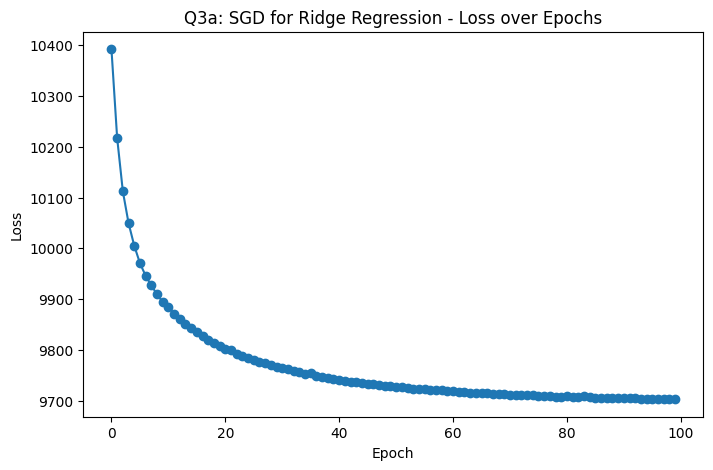

Training with learning rate: 0.0001
Training with learning rate: 0.001
Training with learning rate: 0.01
Training with learning rate: 0.1


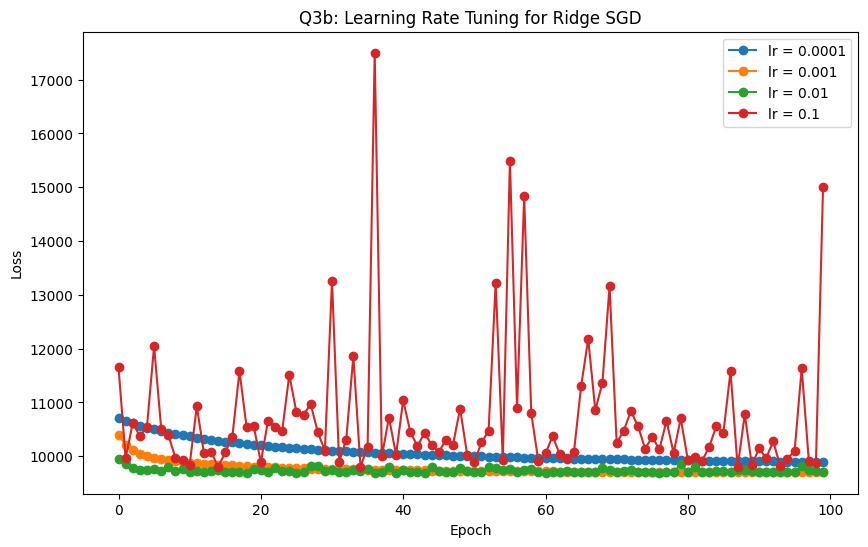

Training with batch size: 1
Training with batch size: 16
Training with batch size: 32
Training with batch size: 64
Training with batch size: 128


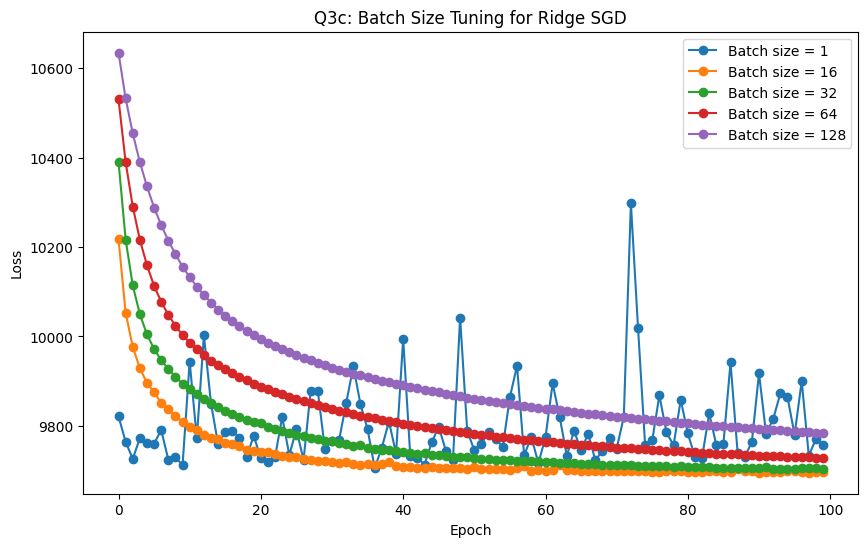

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Main Experiment Code for Q3
def main():
    #
    # Data Loading & Preprocessing (from Q2)
    # For example:
    # trainx, trainy, valx, valy, testx, testy = preprocess_data(train_df, val_df, test_df, target_col='Appliances')
    #
    # Here, we load the CSVs (update paths accordingly)
    train_path = 'downloads/energydata/energy_train.csv'
    val_path   = 'downloads/energydata/energy_val.csv'
    test_path  = 'downloads/energydata/energy_test.csv'
    
    train_df = pd.read_csv(train_path)
    val_df   = pd.read_csv(val_path)
    test_df  = pd.read_csv(test_path)
    
    # Use your existing preprocessing function from Q2.
    # (If you already have these variables in your notebook, you can omit this step.)
    trainx, trainy, valx, valy, testx, testy = preprocess_data(train_df, val_df, test_df, target_col='Appliances')
    
    # Convert trainx and trainy to NumPy arrays if they are DataFrames/Series.
    X_train = trainx.values if isinstance(trainx, pd.DataFrame) else trainx
    y_train = trainy.values if isinstance(trainy, pd.Series) else trainy

   
    # Hyperparameters based on Q2 results
   
    # From your Q2 output, the optimal ridge alpha was 0.001.
    lambda_reg = 0.001  # Optimal regularization from Q2.
    default_batch_size = 32
    default_num_epochs = 100

   
    # Q3a: Run SGD for Ridge Regression using preprocessed data
   
    print("Q3a: Training Ridge Regression with SGD using preprocessed data...")
    sgd_model = RidgeSGD(learning_rate=0.001, lambda_reg=lambda_reg,
                         batch_size=default_batch_size, num_epochs=default_num_epochs)
    epoch_losses = sgd_model.train(X_train, y_train)
    
    # Print the dictionary of epoch losses.
    print("Epoch Values and losses :")
    for epoch, loss in sorted(epoch_losses.items()):
        print(f"Epoch {epoch}: Loss = {loss:.6f}")
    
    # Plot loss vs. epoch.
    plt.figure(figsize=(8, 5))
    plt.plot(list(epoch_losses.keys()), list(epoch_losses.values()), marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Q3a: SGD for Ridge Regression - Loss over Epochs")
    plt.show()
    
    
    # Q3b: Tuning the Learning Rate
    candidate_learning_rates = [0.0001, 0.001, 0.01, 0.1]
    lr_results = experiment_learning_rates(X_train, y_train, lambda_reg=lambda_reg,
                                             batch_size=default_batch_size, num_epochs=default_num_epochs,
                                             learning_rates=candidate_learning_rates)
    
    plt.figure(figsize=(10, 6))
    for lr, losses in lr_results.items():
        epochs = list(losses.keys())
        loss_vals = list(losses.values())
        plt.plot(epochs, loss_vals, marker='o', label=f"lr = {lr}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Q3b: Learning Rate Tuning for Ridge SGD")
    plt.legend()
    plt.show()
    
   
    # Q3c: Tuning the Batch Size
    candidate_batch_sizes = [1, 16, 32, 64, 128]
    bs_results = experiment_batch_sizes(X_train, y_train, lambda_reg=lambda_reg,
                                        learning_rate=0.001, num_epochs=default_num_epochs,
                                        batch_sizes=candidate_batch_sizes)
    
    plt.figure(figsize=(10, 6))
    for bs, losses in bs_results.items():
        epochs = list(losses.keys())
        loss_vals = list(losses.values())
        plt.plot(epochs, loss_vals, marker='o', label=f"Batch size = {bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Q3c: Batch Size Tuning for Ridge SGD")
    plt.legend()
    plt.show()

if __name__ == '__main__':
    main()